In [92]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [93]:
call_df = pd.read_csv('training_data.csv')
# call_df=call_df.iloc[:,1:]
print(len(call_df))
call_df.head()

1052172


,Unnamed: 0,call_id,outlet_id,is_stock_taken,transactionid,user_id,fordate,order_id,order_placed
0,0,100000,8704,False,0050202212052119346386,50,2022-12-05,43740,yes
1,1,1000000,148236,True,0917202308141245081566,917,2023-08-14,466093,yes
2,2,1000001,147759,False,1985202308141245104011,1985,2023-08-14,0,no
3,3,1000002,149200,False,1976202308141245154743,1976,2023-08-14,0,no
4,4,1000004,121385,False,1775202308141245187486,1775,2023-08-14,0,no


In [94]:
cd1 = call_df[call_df['order_id']==0]
print(len(cd1))
cd1.head()

501644


,Unnamed: 0,call_id,outlet_id,is_stock_taken,transactionid,user_id,fordate,order_id,order_placed
2,2,1000001,147759,False,1985202308141245104011,1985,2023-08-14,0,no
3,3,1000002,149200,False,1976202308141245154743,1976,2023-08-14,0,no
4,4,1000004,121385,False,1775202308141245187486,1775,2023-08-14,0,no
5,5,1000006,146762,False,2110202308141245227853,2110,2023-08-14,0,no
6,6,1000007,121659,True,1784202308141245243878,1784,2023-08-14,0,no


In [95]:
call_df.fordate.min()

'2022-07-05'

In [96]:
call_df.columns

Index(['Unnamed: 0', 'call_id', 'outlet_id', 'is_stock_taken', 'transactionid',
       'user_id', 'fordate', 'order_id', 'order_placed'],
      dtype='object')

In [97]:
call_df=call_df.drop(['Unnamed: 0', 'call_id', 'is_stock_taken', 'transactionid',
       'user_id'],axis=1)

In [98]:
outlet_data = pd.read_csv("outlet_data.csv")
outlet_data=outlet_data.iloc[:,1:]
outlet_data.head()

,outlet_id,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,ordering_pattern_mode,high_qty_high_amt,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,beat_name,city,pin,state,outletcategory
0,498,0,144,43643,1,1,1,Frequent,3,0,0,0,NaN,NaN,NaN,NaN,NaN
1,713,36453,8,1403,8,0,0,Frequent,9,0,6,1,Kolsewadi (Kalyan E),Kalyan,421306.0,MAHARASHTRA,Kirana / Grocery / General Store
2,1542,120363,6,1081,7,0,0,Frequent,2,0,6,11,Bhandari (Bhiwandi),Bhiwandi,421302.0,MAHARASHTRA,Kirana / Grocery / General Store
3,1697,0,6,1148,7,0,0,Frequent,1,0,9,9,Teen Batti (Bhiwandi),NaN,NaN,NaN,NaN
4,2032,0,8,1042,9,0,0,Frequent,1,0,0,2,Ram Vadi - Ashagadh - Savta,Dhanu,NaN,MAHARASHTRA,Kirana / Grocery / General Store


In [99]:
outlet_data.city.value_counts()

city
Bangalore     2201
Pune          2017
Hubballi      1556
Belagavi      1349
Anantapur      774
              ... 
Mundgod          1
Ainapur          1
Port Blair       1
Delhi            1
Ongole           1
Name: count, Length: 225, dtype: int64

In [100]:
outlet_data['outletcategory']=outlet_data['outletcategory'].fillna('Kirana / Grocery / General Store')

In [101]:
outlet_data.columns

Index(['outlet_id', 'balance', 'total_quantity', 'total_price',
       'order_frequency_avg', 'days_late_delivery_avg',
       'days_until_delivery_avg', 'ordering_pattern_mode', 'high_qty_high_amt',
       'high_qty_less_amt', 'less_qty_high_amt', 'less_qty_less_amt',
       'beat_name', 'city', 'pin', 'state', 'outletcategory'],
      dtype='object')

In [102]:
outlet_data = outlet_data.drop(['beat_name', 'city', 'pin', 'state'],axis=1)

In [103]:
df1 = pd.merge(call_df,outlet_data,how='inner',on='outlet_id')
print(len(df1))
df1.head()

1052172


,outlet_id,fordate,order_id,order_placed,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,ordering_pattern_mode,high_qty_high_amt,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory
0,8704,2022-12-05,43740,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
1,8704,2023-08-21,0,no,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
2,8704,2023-08-28,0,no,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
3,8704,2023-09-04,496413,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
4,8704,2023-09-11,509043,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store


In [104]:
df1.head()

,outlet_id,fordate,order_id,order_placed,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,ordering_pattern_mode,high_qty_high_amt,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory
0,8704,2022-12-05,43740,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
1,8704,2023-08-21,0,no,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
2,8704,2023-08-28,0,no,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
3,8704,2023-09-04,496413,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store
4,8704,2023-09-11,509043,yes,0,9,1744,9,0,0,Frequent,6,1,8,3,Kirana / Grocery / General Store


In [105]:
df2 = df1.copy()

In [106]:
# df2.set_index('fordate', inplace=True)
 
# df2.sort_values(by=['outlet_id', df2.index.name], inplace=True)
# rolling_counts = df2.groupby('outlet_id').rolling(window='15D').count()
 
# # Remove the 'outlet_id' level from the index to allow for easier merging
# rolling_counts = rolling_counts.reset_index()
 
# # Rename the count column to '15_days_orders_count' and adjust any specific column if necessary
# rolling_counts.rename(columns={'order_count': '15_days_orders_count'}, inplace=True)
 
# # Merge the rolling counts with the original DataFrame
# # First, reset the index of the main DataFrame if you haven't already
# df2.reset_index(inplace=True)
# merged_df2 = pd.merge(df2, rolling_counts, on=['outlet_id', 'fordate'], how='left')
# merged_df2

In [107]:
outlet_frequency = df1['outlet_id'].value_counts(normalize=True)
df1['outlet_frequency'] = df1['outlet_id'].map(outlet_frequency)

In [108]:
df1['fordate'] = pd.to_datetime(df1['fordate'])
df1['days_since_recent_order'] = df1.groupby('outlet_id')['fordate'].transform(lambda x: (pd.Timestamp.now() - x.max()).days)

In [109]:
import pandas as pd

df1['fordate'] = pd.to_datetime(df1['fordate'])

def categorize_month(day):
    if day.day <= 10:
        return 'start_of_month'
    elif day.day <= 20:
        return 'mid_of_month'
    else:
        return 'end_of_month'

df1['month_category'] = df1['fordate'].apply(categorize_month)


In [110]:
df1['fordate'] = pd.to_datetime(df1['fordate'])
df1['call_frequency'] = df1.groupby('outlet_id')['fordate'].diff().dt.days.fillna(0)
df1['day_of_week'] = df1['fordate'].dt.day_of_week
df1['month_of_year'] = df1['fordate'].dt.month
# capturing seasonal trends that might affect the data
df1['quarter'] = df1['fordate'].dt.quarter
# useful for capturing weekly seasonal patterns 
df1['week_of_year'] = df1['fordate'].dt.isocalendar().week
# # some businesses might see increased activity at the beginning or end of the month due to payday or monthly reporting periods
# df1['is_month_start'] = df1['fordate'].dt.is_month_start
# df1['is_month_end'] = df1['fordate'].dt.is_month_end
# df1['is_month_start'] = df1['is_month_start'].astype(int)
# df1['is_month_end'] = df1['is_month_end'].astype(int)



df1.head()

,outlet_id,fordate,order_id,order_placed,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,...,less_qty_less_amt,outletcategory,outlet_frequency,days_since_recent_order,month_category,call_frequency,day_of_week,month_of_year,quarter,week_of_year
0,8704,2022-12-05,43740,yes,0,9,1744,9,0,0,...,3,Kirana / Grocery / General Store,0.000084,56,start_of_month,0.0,0,12,4,49
1,8704,2023-08-21,0,no,0,9,1744,9,0,0,...,3,Kirana / Grocery / General Store,0.000084,56,end_of_month,259.0,0,8,3,34
2,8704,2023-08-28,0,no,0,9,1744,9,0,0,...,3,Kirana / Grocery / General Store,0.000084,56,end_of_month,7.0,0,8,3,35
3,8704,2023-09-04,496413,yes,0,9,1744,9,0,0,...,3,Kirana / Grocery / General Store,0.000084,56,start_of_month,7.0,0,9,3,36
4,8704,2023-09-11,509043,yes,0,9,1744,9,0,0,...,3,Kirana / Grocery / General Store,0.000084,56,mid_of_month,7.0,0,9,3,37


In [111]:
df1.columns

Index(['outlet_id', 'fordate', 'order_id', 'order_placed', 'balance',
       'total_quantity', 'total_price', 'order_frequency_avg',
       'days_late_delivery_avg', 'days_until_delivery_avg',
       'ordering_pattern_mode', 'high_qty_high_amt', 'high_qty_less_amt',
       'less_qty_high_amt', 'less_qty_less_amt', 'outletcategory',
       'outlet_frequency', 'days_since_recent_order', 'month_category',
       'call_frequency', 'day_of_week', 'month_of_year', 'quarter',
       'week_of_year'],
      dtype='object')

In [112]:
df1.outlet_frequency.value_counts()


outlet_frequency
0.000040    22680
0.000036    22002
0.000035    21867
0.000043    21735
0.000034    21348
            ...  
0.000100      105
0.000099      104
0.000097      102
0.000094       99
0.000092       97
Name: count, Length: 125, dtype: int64

In [113]:
# ot2.to_csv("false_stock_order_ids.csv")
ot3 =outlet_data[outlet_data['outlet_id']==158685]
ot3

,outlet_id,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,ordering_pattern_mode,high_qty_high_amt,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory


In [114]:
final_df = df1

In [115]:
ordering_pattern_mapping = {'Frequent': 3,'Regular': 2, 'Occasional': 1, 'Infrequent': 0}
final_df["ordering_pattern_mode"]= final_df['ordering_pattern_mode'].map(ordering_pattern_mapping)

order_placed_mapping ={'yes':1,'no':0}
final_df['order_placed'] =final_df['order_placed'].map(order_placed_mapping)

month_cat_mapping ={'start_of_month':0,'mid_of_month':1,'end_of_month':2}
final_df['month_category'] =final_df['month_category'].map(month_cat_mapping)

outlet_cat_mapping = {'Self Service Store / Stand Alone / Super Market': 0,'HoReCa': 1,'Pan / Cigarette Shop / Tea Point': 2, 
                      'Bakery / Sweets & Snacks Shop / Juice Center': 3, 'Kirana / Grocery / General Store': 4,'Chemist / Medical Store':5,
                      'Wholesaler':6,'Dairy / Ice Cream Parlour':7,'Oil Trader':8,'Liquor Shop':9,'Hospital':10}
final_df["outletcategory"]= final_df['outletcategory'].map(outlet_cat_mapping)

final_df.head()

,outlet_id,fordate,order_id,order_placed,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,...,less_qty_less_amt,outletcategory,outlet_frequency,days_since_recent_order,month_category,call_frequency,day_of_week,month_of_year,quarter,week_of_year
0,8704,2022-12-05,43740,1,0,9,1744,9,0,0,...,3,4,0.000084,56,0,0.0,0,12,4,49
1,8704,2023-08-21,0,0,0,9,1744,9,0,0,...,3,4,0.000084,56,2,259.0,0,8,3,34
2,8704,2023-08-28,0,0,0,9,1744,9,0,0,...,3,4,0.000084,56,2,7.0,0,8,3,35
3,8704,2023-09-04,496413,1,0,9,1744,9,0,0,...,3,4,0.000084,56,0,7.0,0,9,3,36
4,8704,2023-09-11,509043,1,0,9,1744,9,0,0,...,3,4,0.000084,56,1,7.0,0,9,3,37


In [116]:
# plt.figure(figsize=(10,5))
# sns.heatmap(final_df.corr(),annot=True,cmap='RdYlBu_r')

In [117]:
# sns.pairplot(df)
final_df.columns

Index(['outlet_id', 'fordate', 'order_id', 'order_placed', 'balance',
       'total_quantity', 'total_price', 'order_frequency_avg',
       'days_late_delivery_avg', 'days_until_delivery_avg',
       'ordering_pattern_mode', 'high_qty_high_amt', 'high_qty_less_amt',
       'less_qty_high_amt', 'less_qty_less_amt', 'outletcategory',
       'outlet_frequency', 'days_since_recent_order', 'month_category',
       'call_frequency', 'day_of_week', 'month_of_year', 'quarter',
       'week_of_year'],
      dtype='object')

In [203]:
X = final_df.drop(['order_placed','fordate','days_late_delivery_avg','quarter','week_of_year','order_id','outlet_frequency'], axis=1)
#'outletcategory','day_of_week','total_quantity','month_category','total_price'
y = final_df['order_placed']

In [204]:
X['outlet_id'] = X['outlet_id'].astype('category')
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=['outlet_id'],)
encoder.fit_transform(X, y)

,outlet_id,balance,total_quantity,total_price,order_frequency_avg,days_until_delivery_avg,ordering_pattern_mode,high_qty_high_amt,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory,days_since_recent_order,month_category,call_frequency,day_of_week,month_of_year
0,0.727046,0,9,1744,9,0,3,6,1,8,3,4,56,0,0.0,0,12
1,0.727046,0,9,1744,9,0,3,6,1,8,3,4,56,2,259.0,0,8
2,0.727046,0,9,1744,9,0,3,6,1,8,3,4,56,2,7.0,0,8
3,0.727046,0,9,1744,9,0,3,6,1,8,3,4,56,0,7.0,0,9
4,0.727046,0,9,1744,9,0,3,6,1,8,3,4,56,1,7.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052167,0.590860,0,29,370,3,0,3,0,2,0,0,4,269,1,7.0,4,8
1052168,0.590860,0,32,520,3,0,3,0,2,0,0,4,268,0,0.0,5,8
1052169,0.590860,0,32,520,3,0,3,0,2,0,0,4,268,1,7.0,5,8
1052170,0.590860,0,2,116,3,0,3,0,0,0,2,4,268,0,0.0,5,8


In [131]:
df1[df1['order_id']==453737]

,outlet_id,fordate,order_id,order_placed,balance,total_quantity,total_price,order_frequency_avg,days_late_delivery_avg,days_until_delivery_avg,...,less_qty_less_amt,outletcategory,outlet_frequency,days_since_recent_order,month_category,call_frequency,day_of_week,month_of_year,quarter,week_of_year
1052170,151287,2023-08-05,453737,1,0,2,116,3,0,0,...,2,4,0.000002,268,0,0.0,5,8,3,31


In [121]:
# xdf =df1[df1['outlet_id']==151287]
# print(len(xdf))
# print(len(xdf[xdf['order_placed']==1]))
# xdf

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [238]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({1: 440548, 0: 401189})


In [125]:
# # oversampling using SMOTE
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# counter = Counter(y_train)
# print(counter)

In [239]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6026250261362124


In [127]:
ss

NameError: name 'ss' is not defined

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)
# Accuracy: 0.6252477011903913
# by dropping X = final_df.drop(['outlet_id','total_quantity', 'total_price','order_placed','fordate','days_late_delivery_avg','quarter','week_of_year','order_id','is_month_start', 'is_month_end'], axis=1)
# y = final_df['order_placed']

In [253]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train,y_train)

predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Target on test data [0 1 1 ... 0 0 0]

accuracy_score on test dataset :  0.6549259632382292
Accuracy: 0.6549259632382292


#### Prediction

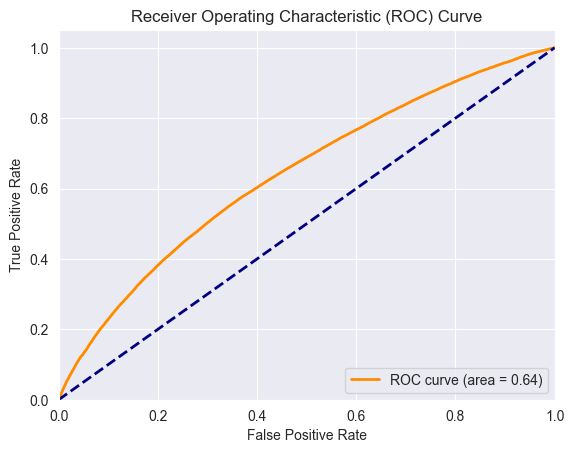

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Feature: outlet_id, Score: 0.01837
Feature: balance, Score: 0.07404
Feature: total_quantity, Score: 0.00222
Feature: total_price, Score: -0.01959
Feature: order_frequency_avg, Score: -0.02820
Feature: days_until_delivery_avg, Score: 0.02189
Feature: ordering_pattern_mode, Score: 0.05785
Feature: high_qty_high_amt, Score: 0.41147
Feature: high_qty_less_amt, Score: 0.31125
Feature: less_qty_high_amt, Score: 0.17441
Feature: less_qty_less_amt, Score: 0.22561
Feature: outletcategory, Score: -0.00953
Feature: days_since_recent_order, Score: 0.16658
Feature: month_category, Score: -0.00719
Feature: call_frequency, Score: -0.02729
Feature: day_of_week, Score: 0.00195
Feature: month_of_year, Score: -0.01139


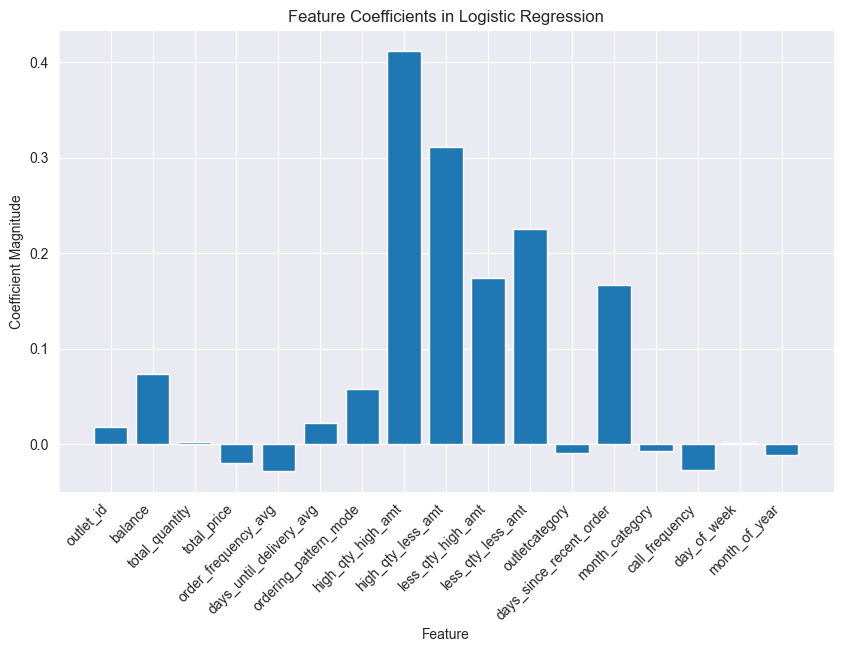

In [240]:
# Get feature coefficients
importance = model.coef_[0]

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))

plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Coefficients in Logistic Regression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [210]:
pred = model.predict_proba(X_test)
pred

array([[0.98      , 0.02      ],
       [0.41      , 0.59      ],
       [0.68      , 0.32      ],
       ...,
       [0.96633333, 0.03366667],
       [0.61866667, 0.38133333],
       [0.92      , 0.08      ]])

In [254]:
# Predict probabilities on the validation set for both classes
y_probabilities = model.predict_proba(X_test)

# Extract probabilities for positive and negative outcomes
positive_probabilities = y_probabilities[:, 1]  # Probabilities of belonging to class 1 (positive outcome)
negative_probabilities = y_probabilities[:, 0]  # Probabilities of belonging to class 0 (negative outcome)

# Combine actual outcomes and predicted probabilities into a DataFrame
predicted_data = pd.DataFrame({'y': y_test, 'p_positive': positive_probabilities, 'p_negative': negative_probabilities})

# Write the predicted data to a CSV file
predicted_data.to_csv('predicted_data.csv', index=False)

print("Predicted data saved to predicted_data.csv")

Predicted data saved to predicted_data.csv


### Decile method

#### method 1
ref . https://www.analyticsvidhya.com/blog/2021/09/how-to-evaluate-the-business-value-of-ml-model/

In [ ]:
max_prob = round(pd.DataFrame(np.amax(pred, axis=1), columns = ['prob_glm']),2)
max_prob.head()

,prob_glm
0,0.68
1,0.81
2,0.56
3,0.61
4,0.57


In [ ]:
max_prob['Decile_rank_glm'] = pd.cut(max_prob['prob_glm'], 10, labels = np.arange(10,0, -1))
max_prob.head()

,prob_glm,Decile_rank_glm
0,0.68,7
1,0.81,4
2,0.56,9
3,0.61,8
4,0.57,9


In [1]:
# import kds
# kds.metrics.plot_cumulative_gain(y_test.to_numpy(), pred[:,1])

#### method 2
ref . https://pypi.org/project/kds/

In [248]:
from sklearn.model_selection import train_test_split
from sklearn import tree


# clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

import kds
kds.metrics.decile_table(y_test, y_prob[:,1])

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,...,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.683,0.990,0.757,...,19.087,5.406,8.769,1.418
1,2,0.616,0.683,0.646,...,38.174,12.262,14.770,1.352
2,3,0.573,0.616,0.593,...,57.261,20.305,18.505,1.294
3,4,0.541,0.573,0.557,...,76.347,29.383,20.266,1.241
4,5,0.509,0.541,0.525,...,95.432,39.191,20.631,1.196
5,6,0.481,0.509,0.495,...,100.000,50.081,18.932,1.150
6,7,0.450,0.481,0.466,...,100.000,61.356,16.499,1.112
7,8,0.419,0.450,0.435,...,100.000,73.412,12.575,1.075
8,9,0.381,0.419,0.401,...,100.000,86.089,7.466,1.039
9,10,0.149,0.381,0.347,...,100.000,100.000,0.000,1.000


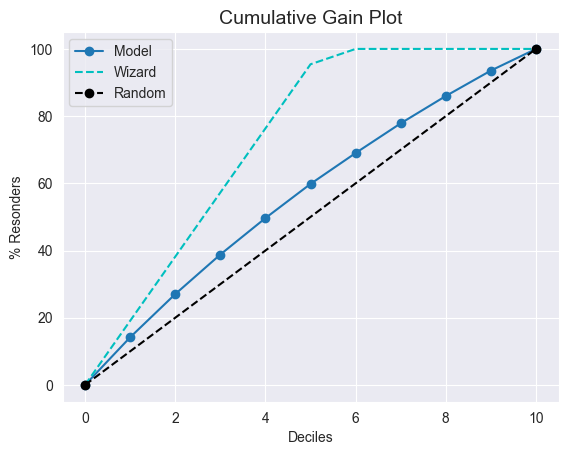

In [251]:
kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])

#### method 3
ref . https://www.listendata.com/2019/07/KS-Statistics-Python.html

In [255]:
prob_df = pd.read_csv('predicted_data.csv')
prob_df.head()

,y,p_positive,p_negative
0,0,0.337008,0.662992
1,1,0.752366,0.247634
2,0,0.655600,0.344400
3,1,0.833070,0.166930
4,0,0.607387,0.392613


In [256]:
prob_df['prob'] = prob_df.apply(lambda row: row['p_positive'] if row['y'] == 1 else row['p_negative'], axis=1)
prob_df = prob_df[['y', 'prob']]

prob_df.head()

,y,prob
0,0,0.662992
1,1,0.752366
2,0,0.344400
3,1,0.833070
4,0,0.392613


In [257]:
prob_df[prob_df['y']==1].sort_values(by='prob')

,y,prob
85608,1,0.061317
71364,1,0.068338
11110,1,0.072524
17829,1,0.077740
100856,1,0.080970
...,...,...
5301,1,0.988439
69813,1,0.988579
24338,1,0.988776
38974,1,0.988832


In [259]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [260]:
mydf = ks(data=prob_df,target="y", prob="prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.796247  0.990434    7832       2690     14.21%         5.37%   
2       0.716812  0.796232    5948       4574     10.79%         9.13%   
3       0.658048  0.716802    5265       5257      9.55%        10.49%   
4       0.609600  0.658047    4992       5529      9.06%        11.04%   
5       0.566783  0.609600    4964       5558      9.00%        11.10%   
6       0.524893  0.566779    4881       5641      8.85%        11.26%   
7       0.478685  0.524892    5293       5228      9.60%        10.44%   
8       0.426793  0.478683    5557       4965     10.08%         9.91%   
9       0.355255  0.426790    5590       4932     10.14%         9.85%   
10      0.021895  0.355243    4805       5717      8.72%        11.41%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             14.21

In [247]:
mydf.head()

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.670433,0.990122,8989,1533,16.31%,3.06%,16.31%,3.06%,13.2
2,0.621015,0.670432,5294,5228,9.60%,10.44%,25.91%,13.50%,12.4
3,0.586280,0.621012,4887,5635,8.86%,11.25%,34.77%,24.75%,10.0
4,0.557499,0.586271,5064,5457,9.19%,10.89%,43.96%,35.64%,8.3
5,0.529168,0.557496,5254,5268,9.53%,10.52%,53.49%,46.16%,7.3
